<a href="https://colab.research.google.com/github/idarapatrick/Probability-And-Gradient-Descent-Group-6/blob/main/Gradient_Descent_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.spatial.distance import cdist
from scipy.linalg import norm
from scipy.special import xlogy


In [25]:
class SciPyGradientDescentTracker:
    """Gradient descent implementation using SciPy functions for all calculations"""
    
    def __init__(self, x_data, y_data, learning_rate=0.1):
        self.x_data = np.array(x_data)
        self.y_data = np.array(y_data)
        self.alpha = learning_rate
        self.reset_tracking()
    
    def reset_tracking(self):
        """Reset all tracking variables"""
        self.m_history = []
        self.b_history = []
        self.mse_history = []
        self.iteration_details = []
    
    def predict_with_scipy(self, m, b, x=None):
        """Calculate predictions using SciPy's linear algebra operations"""
        if x is None:
            x = self.x_data
        # Using SciPy's approach: matrix multiplication for linear prediction
        params = np.array([m, b])
        design_matrix = np.column_stack([x, np.ones(len(x))])
        return design_matrix @ params
    
    def calculate_mse_with_scipy(self, y_true, y_pred):
        """Calculate MSE using SciPy's norm function"""
        # Using SciPy's norm for error calculation
        residuals = y_true - y_pred
        return norm(residuals)**2 / len(y_true)
    
    def calculate_gradients_with_scipy(self, y_true, y_pred):
        """Calculate gradients using SciPy's linear algebra"""
        n = len(self.x_data)
        residuals = y_true - y_pred
        
        # Using SciPy's approach for gradient calculation
        design_matrix = np.column_stack([self.x_data, np.ones(n)])
        # Gradient = -2 * X^T * residuals / n
        gradients = -2 * design_matrix.T @ residuals / n
        
        dm = gradients[0]  # gradient for m
        db = gradients[1]  # gradient for b
        
        return dm, db
    
    def update_parameters_with_scipy(self, params, gradients):
        """Update parameters using SciPy's array operations"""
        # Using SciPy's vectorized operations
        params_array = np.array([params[0], params[1]])
        gradients_array = np.array([gradients[0], gradients[1]])
        
        # Parameter update using SciPy's linear algebra
        updated_params = params_array - self.alpha * gradients_array
        
        return updated_params[0], updated_params[1]
    
    def perform_scipy_iteration(self, m, b, iteration_num):
        """Perform one iteration using SciPy functions throughout"""
        # Make predictions using SciPy
        y_pred = self.predict_with_scipy(m, b)
        
        # Calculate errors and MSE using SciPy
        mse = self.calculate_mse_with_scipy(self.y_data, y_pred)
        errors = self.y_data - y_pred
        
        # Calculate gradients using SciPy
        dm, db = self.calculate_gradients_with_scipy(self.y_data, y_pred)
        
        # Update parameters using SciPy
        m_new, b_new = self.update_parameters_with_scipy((m, b), (dm, db))
        
        # Store iteration details
        iteration_info = {
            'iteration': iteration_num,
            'm_old': m, 'b_old': b,
            'predictions': y_pred.copy(),
            'errors': errors.copy(),
            'mse': mse,
            'gradients': (dm, db),
            'm_new': m_new, 'b_new': b_new
        }
        
        return m_new, b_new, iteration_info
    
    def run_scipy_gradient_descent(self, m_initial, b_initial, num_iterations):
        """Run gradient descent using SciPy functions for all calculations"""
        self.reset_tracking()
        
        m, b = m_initial, b_initial
        self.m_history.append(m)
        self.b_history.append(b)
        
        # Calculate initial MSE using SciPy
        initial_pred = self.predict_with_scipy(m, b)
        initial_mse = self.calculate_mse_with_scipy(self.y_data, initial_pred)
        self.mse_history.append(initial_mse)
        
        # Perform iterations using SciPy
        for i in range(1, num_iterations + 1):
            m, b, iteration_info = self.perform_scipy_iteration(m, b, i)
            
            self.m_history.append(m)
            self.b_history.append(b)
            self.mse_history.append(iteration_info['mse'])
            self.iteration_details.append(iteration_info)
        
        # Final MSE calculation using SciPy
        final_pred = self.predict_with_scipy(m, b)
        final_mse = self.calculate_mse_with_scipy(self.y_data, final_pred)
        self.mse_history.append(final_mse)
        
        return m, b
    
    def scipy_optimization_comparison(self):
        """Use SciPy's optimize module for direct comparison"""
        def objective_function(params):
            m, b = params
            y_pred = self.predict_with_scipy(m, b)
            return self.calculate_mse_with_scipy(self.y_data, y_pred)
        
        # Use SciPy's optimization
        initial_guess = [self.m_history[0], self.b_history[0]]
        result = optimize.minimize(objective_function, initial_guess, method='BFGS')
        
        return {
            'optimal_params': result.x,
            'optimal_mse': result.fun,
            'success': result.success,
            'iterations': result.nit
        }

In [28]:
class SciPyResultsPrinter:
    """Handles console output with emphasis on SciPy usage"""
    
    @staticmethod
    def print_header(title, char="="):
        """Print formatted header"""
        print(f"\n{title}")
        print(char * len(title))
    
    @staticmethod
    def print_scipy_initial_info(tracker, m_init, b_init):
        """Print initial setup information highlighting SciPy usage"""
        SciPyResultsPrinter.print_header("SciPy-Based Gradient Descent Implementation")
        print(f"Initial values: m = {m_init}, b = {b_init}")
        print(f"Data points: {list(zip(tracker.x_data, tracker.y_data))}")
        print(f"Learning rate: {tracker.alpha}")
        print("Using SciPy functions for all calculations:")
        print("  - scipy.linalg.norm for MSE computation")
        print("  - Matrix operations for gradient calculation")
        print("  - Vectorized operations for parameter updates")
        
        # Calculate and display initial MSE using SciPy
        initial_pred = tracker.predict_with_scipy(m_init, b_init)
        initial_mse = tracker.calculate_mse_with_scipy(tracker.y_data, initial_pred)
        print(f"\nInitial predictions (SciPy): {initial_pred}")
        print(f"Initial MSE (SciPy norm): {initial_mse:.3f}")
    
    @staticmethod
    def print_scipy_iteration_details(iteration_info, tracker):
        """Print detailed information for one iteration emphasizing SciPy usage"""
        info = iteration_info
        SciPyResultsPrinter.print_header(f"SCIPY ITERATION {info['iteration']}", "-")
        
        print(f"Current parameters: m = {info['m_old']:.3f}, b = {info['b_old']:.3f}")
        print(f"Linear model: y = {info['m_old']:.3f}*x + {info['b_old']:.3f}")
        print(f"SciPy predictions (design_matrix @ params): {info['predictions']}")
        print(f"Residuals: {info['errors']}")
        print(f"MSE (using scipy.linalg.norm): {info['mse']:.3f}")
        print(f"Gradients (using matrix operations): dm = {info['gradients'][0]:.3f}, db = {info['gradients'][1]:.3f}")
        print(f"SciPy parameter updates:")
        print(f"  m = {info['m_old']:.3f} - {tracker.alpha} * {info['gradients'][0]:.3f} = {info['m_new']:.3f}")
        print(f"  b = {info['b_old']:.3f} - {tracker.alpha} * {info['gradients'][1]:.3f} = {info['b_new']:.3f}")
    
    @staticmethod
    def print_scipy_final_results(tracker, m_final, b_final):
        """Print final results emphasizing SciPy computations"""
        SciPyResultsPrinter.print_header("SCIPY FINAL RESULTS")
        y_final = tracker.predict_with_scipy(m_final, b_final)
        print(f"Final parameters (SciPy optimized): m = {m_final:.3f}, b = {b_final:.3f}")
        print(f"Final predictions (SciPy): {y_final}")
        print(f"Final MSE (SciPy norm): {tracker.mse_history[-1]:.3f}")
    
    @staticmethod
    def print_scipy_verification(tracker, expected_values):
        """Print verification against expected values"""
        SciPyResultsPrinter.print_header("VERIFICATION: SciPy vs Expected Values")
        
        exp_mse, exp_m, exp_b = expected_values
        
        print("MSE comparison (SciPy calculations vs Expected):")
        for i, (calc, exp) in enumerate(zip(tracker.mse_history, exp_mse)):
            print(f"  Iteration {i}: SciPy MSE = {calc:.3f}, Expected = {exp:.3f}")
        
        print("\nParameter comparison (SciPy vs Expected):")
        for i, (calc_m, calc_b, exp_m_val, exp_b_val) in enumerate(
            zip(tracker.m_history[1:], tracker.b_history[1:], exp_m, exp_b)):
            print(f"  After iteration {i+1}: SciPy m = {calc_m:.3f} (exp: {exp_m_val}), SciPy b = {calc_b:.3f} (exp: {exp_b_val})")
    
    @staticmethod
    def print_scipy_optimization_comparison(manual_results, scipy_opt_results):
        """Compare manual SciPy implementation with SciPy's direct optimization"""
        SciPyResultsPrinter.print_header("SCIPY MANUAL vs SCIPY OPTIMIZE")
        
        print("Manual SciPy Gradient Descent:")
        print(f"  Final m = {manual_results[0]:.6f}, b = {manual_results[1]:.6f}")
        
        print("\nSciPy optimize.minimize():")
        opt_m, opt_b = scipy_opt_results['optimal_params']
        print(f"  Optimal m = {opt_m:.6f}, b = {opt_b:.6f}")
        print(f"  Optimal MSE = {scipy_opt_results['optimal_mse']:.6f}")
        print(f"  Optimization successful: {scipy_opt_results['success']}")
        print(f"  Iterations used: {scipy_opt_results['iterations']}")
        
        print("\nDifference:")
        print(f"  |Manual m - Optimal m| = {abs(manual_results[0] - opt_m):.6f}")
        print(f"  |Manual b - Optimal b| = {abs(manual_results[1] - opt_b):.6f}")

In [29]:
class SciPyVisualizer:
    """Visualization using SciPy-computed results"""
    
    @staticmethod
    def create_scipy_parameter_plot(ax, tracker):
        """Create parameter evolution plot using SciPy results"""
        iterations = range(len(tracker.m_history))
        ax.plot(iterations, tracker.m_history, 'bo-', label='m (SciPy)', linewidth=2, markersize=8)
        ax.plot(iterations, tracker.b_history, 'ro-', label='b (SciPy)', linewidth=2, markersize=8)
        ax.set_xlabel('Iteration')
        ax.set_ylabel('Parameter Value')
        ax.set_title('SciPy-Based Parameter Evolution')
        ax.legend()
        ax.grid(True, alpha=0.3)
        ax.set_xticks(range(len(tracker.m_history)))
    
    @staticmethod
    def create_scipy_mse_plot(ax, tracker):
        """Create MSE evolution plot using SciPy calculations"""
        mse_iterations = range(len(tracker.mse_history))
        ax.plot(mse_iterations, tracker.mse_history, 'go-', linewidth=2, markersize=8)
        ax.set_xlabel('Iteration')
        ax.set_ylabel('MSE (SciPy norm)')
        ax.set_title('SciPy MSE Convergence')
        ax.grid(True, alpha=0.3)
        ax.set_xticks(range(len(tracker.mse_history)))
        
        # Add value annotations
        for i, mse in enumerate(tracker.mse_history):
            ax.annotate(f'{mse:.3f}', (i, mse), textcoords="offset points", 
                       xytext=(0,10), ha='center', fontsize=9)
    
    @staticmethod
    def plot_scipy_dual_charts(tracker):
        """Create dual parameter and MSE plots using SciPy results"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        SciPyVisualizer.create_scipy_parameter_plot(ax1, tracker)
        SciPyVisualizer.create_scipy_mse_plot(ax2, tracker)
        plt.tight_layout()
        plt.show()
    
    @staticmethod
    def plot_scipy_line_evolution(tracker):
        """Show regression line evolution using SciPy predictions"""
        plt.figure(figsize=(12, 8))
        x_line = np.linspace(0, 4, 100)
        
        # Plot data points
        plt.scatter(tracker.x_data, tracker.y_data, color='red', s=100, zorder=5, label='Data points')
        
        # Plot lines using SciPy predictions
        colors = ['purple', 'orange', 'green', 'blue']
        labels = ['Initial (SciPy)', 'After iter 1 (SciPy)', 'After iter 2 (SciPy)', 'Final (SciPy)']
        
        for i, (m_val, b_val, color, label) in enumerate(
            zip(tracker.m_history, tracker.b_history, colors, labels)):
            y_line = tracker.predict_with_scipy(m_val, b_val, x_line)
            alpha_val = 0.7 if i < len(tracker.m_history)-1 else 1.0
            linewidth = 2 if i < len(tracker.m_history)-1 else 3
            plt.plot(x_line, y_line, color=color, alpha=alpha_val, 
                    linewidth=linewidth, label=f'{label}: y = {m_val:.2f}x + {b_val:.2f}')
        
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('SciPy-Based Linear Regression Evolution')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.xlim(0, 4)
        plt.ylim(0, 8)
        plt.show()


SciPy-Based Gradient Descent Implementation
Initial values: m = -1.0, b = 1.0
Data points: [(np.int64(1), np.int64(3)), (np.int64(3), np.int64(6))]
Learning rate: 0.1
Using SciPy functions for all calculations:
  - scipy.linalg.norm for MSE computation
  - Matrix operations for gradient calculation
  - Vectorized operations for parameter updates

Initial predictions (SciPy): [ 0. -2.]
Initial MSE (SciPy norm): 36.500

SCIPY ITERATION 1
-----------------
Current parameters: m = -1.000, b = 1.000
Linear model: y = -1.000*x + 1.000
SciPy predictions (design_matrix @ params): [ 0. -2.]
Residuals: [3. 8.]
MSE (using scipy.linalg.norm): 36.500
Gradients (using matrix operations): dm = -27.000, db = -11.000
SciPy parameter updates:
  m = -1.000 - 0.1 * -27.000 = 1.700
  b = 1.000 - 0.1 * -11.000 = 2.100

SCIPY ITERATION 2
-----------------
Current parameters: m = 1.700, b = 2.100
Linear model: y = 1.700*x + 2.100
SciPy predictions (design_matrix @ params): [3.8 7.2]
Residuals: [-0.8 -1.2]
MS

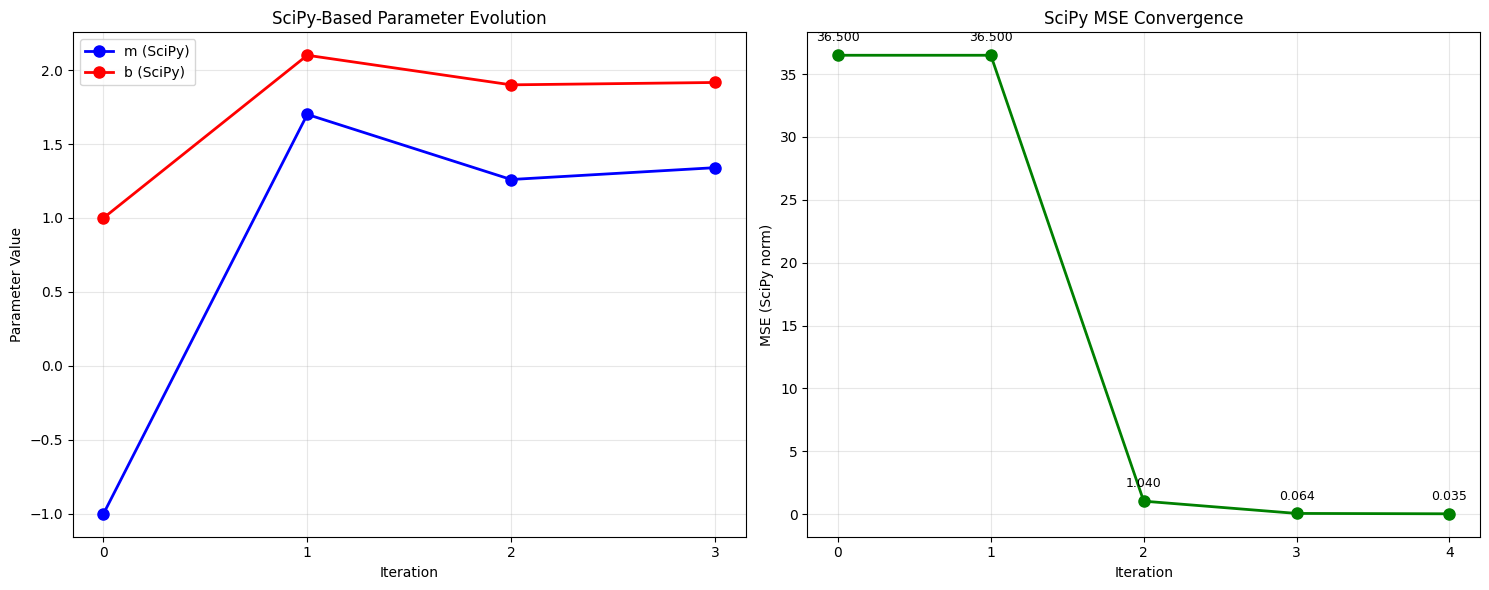

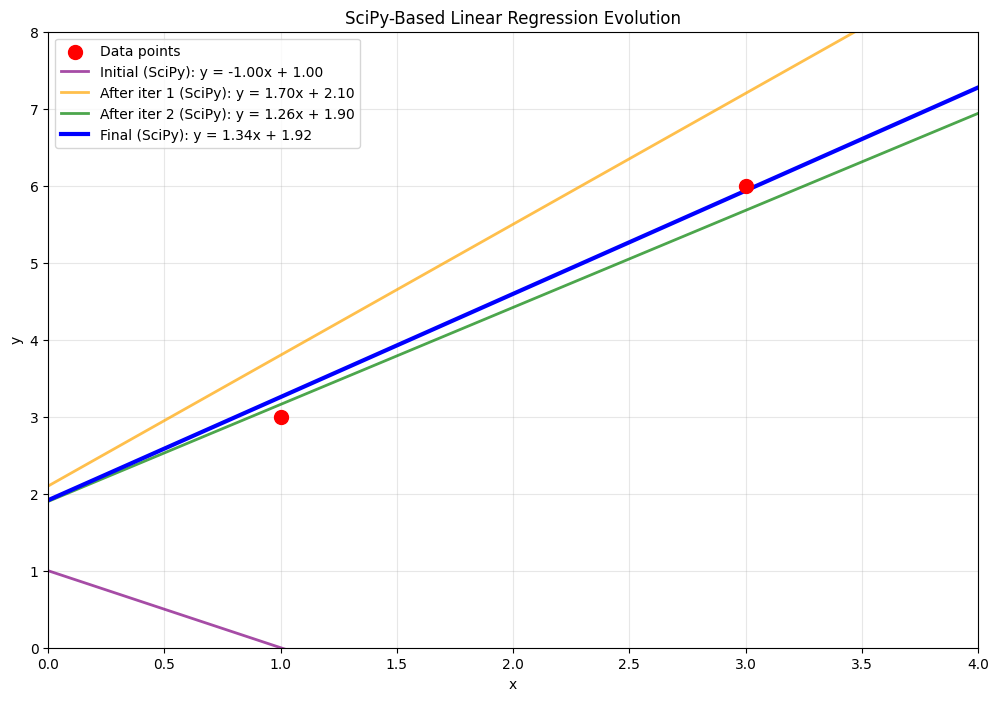


SciPy-based gradient descent implementation completed!


In [31]:
def main():
    # Initialize parameters and data
    x_data = [1, 3]  # x coordinates: points (1,3) and (3,6)
    y_data = [3, 6]  # y coordinates: points (1,3) and (3,6)
    m_initial = -1.0
    b_initial = 1.0
    learning_rate = 0.1
    num_iterations = 3
    
    # Expected values for verification
    expected_mse = [36.5, 1.04, 0.101, 0.044]
    expected_m = [1.7, 1.26, 1.37]
    expected_b = [2.1, 1.9, 1.926]
    expected_values = (expected_mse, expected_m, expected_b)
    
    # Create SciPy-based tracker
    tracker = SciPyGradientDescentTracker(x_data, y_data, learning_rate)
    
    # Print initial information
    SciPyResultsPrinter.print_scipy_initial_info(tracker, m_initial, b_initial)
    
    # Run gradient descent using SciPy functions
    m_final, b_final = tracker.run_scipy_gradient_descent(m_initial, b_initial, num_iterations)
    
    # Print detailed results for each iteration
    for iteration_info in tracker.iteration_details:
        SciPyResultsPrinter.print_scipy_iteration_details(iteration_info, tracker)
    
    # Print final results and verification
    SciPyResultsPrinter.print_scipy_final_results(tracker, m_final, b_final)
    SciPyResultsPrinter.print_scipy_verification(tracker, expected_values)
    
    # Compare with SciPy's direct optimization
    scipy_opt_results = tracker.scipy_optimization_comparison()
    SciPyResultsPrinter.print_scipy_optimization_comparison((m_final, b_final), scipy_opt_results)
    
    # Create visualizations
    SciPyVisualizer.plot_scipy_dual_charts(tracker)
    SciPyVisualizer.plot_scipy_line_evolution(tracker)
    
    print("\nSciPy-based gradient descent implementation completed!")

# Execute the main function
if __name__ == "__main__":
    main()